<title>Lab 3 - Univariate Linear Regression on the Scikit-Learn Diabetes Dataset</title>

# Lab 3 - Univariate Linear Regression on the Scikit-Learn Diabetes Dataset
#### Parthasarathy Rajendiran <br>8883828<hr>

***<u>Big Picture</u>***   
<p> Diabetes is a chronic health condition that affects that how the consumed food turns into energy. With diabetes, the body doesn't make enough insulin (which lets the blood sugar into celss for use as energy) and this leads to serious problems like heart disease, kidney disease, or vision loss.</p>
<p> A study by Diabetes Canada in Feb 2022 states that 30% of Canadians live with diabetes or prediabetes and only 10% were diagnosed in it.

***<u>Problem Statement</u>***
<p>There are many factors in causing diabetes like Obesity, Insulin resistance, Genetic mutatinos, Hormonal diseases, etc. In this analysis, we are considering only Obesity and its effect to diabetes progression.</p>
<p>Body Mass Index (BMI) is the most common method to measure obesity. Here, we are going to build a model to predict the diabetes progression based on BMI. </p>
<hr>

## Loading Data

##### Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set_theme()

##### Diabetes dataset from scikit-learn

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [3]:
diabetes_X.shape, len(diabetes_y)

((442, 10), 442)

In [4]:
display(diabetes_X, diabetes_y)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

<hr>  

## Data Exploration ##

In [5]:
diabetes_X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [6]:
df_corr = diabetes_X.join(pd.Series(diabetes_y)).corr()
df_corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


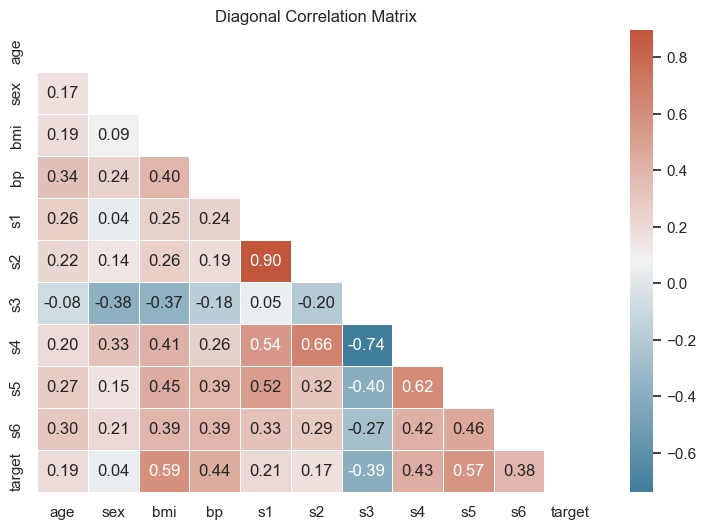

In [7]:
sns.set_theme(style='white')
mask = np.triu(np.ones_like(df_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.title('Diagonal Correlation Matrix')
plt.show()

From this correlation matrix, we can observe that the bmi feature has more correlation with the target variable. This is a positive correlation with 0.59 as correlation coefficient.

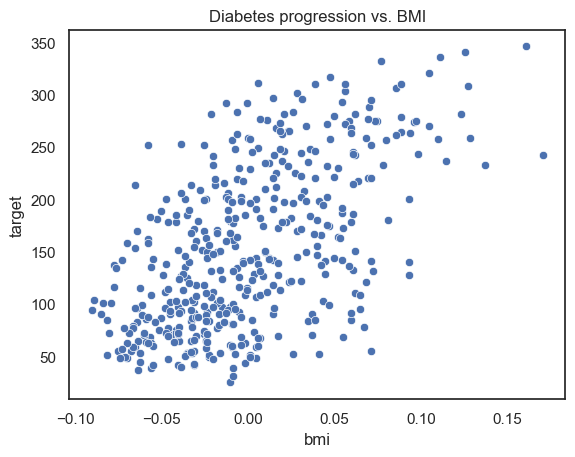

In [8]:
sns.scatterplot(x=diabetes_X['bmi'], y=diabetes_y)
plt.ylabel = 'diabetes progression'
plt.title('Diabetes progression vs. BMI')
plt.show()

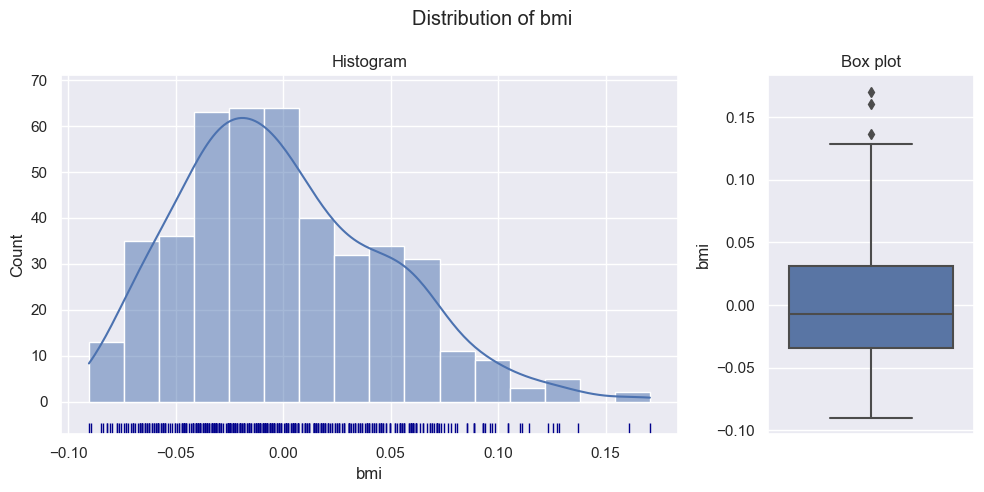

In [9]:
sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(10, 5), width_ratios=[3, 1])
sns.rugplot(x='bmi', data=diabetes_X, height=.03, color='darkblue', ax=axes[0])
sns.histplot(x='bmi', data=diabetes_X, kde=True, ax=axes[0])
axes[0].set_title('Histogram')
sns.boxplot(y=diabetes_X['bmi'], ax=axes[1])
axes[1].set_title('Box plot')
plt.suptitle('Distribution of bmi')
fig.tight_layout()
plt.show()

The distribution of bmi column is a normal distribution with slight skew towards right. This skewness is because of the outliers and the Box plot is clearly showing the outliers.

<hr>  

## Data Preparation

In [10]:
df = diabetes_X.join(diabetes_y)

#### Removing outliers

In [11]:
# As we have outliers above upper fence of the box plot, we can get upper fence using IQR method
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
print(f'The bmi value above {upper_fence} are outliers')

# Removing outliers
df = df[df['bmi'] < upper_fence]
print(f'Shape of the dataset after removing outliers: {df.shape}')
print(f'{diabetes_X.shape[0] - df.shape[0]} outliers are removed')

The bmi value above 0.1294636406639386 are outliers
Shape of the dataset after removing outliers: (439, 11)
3 outliers are removed


#### Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['bmi']], df['target'], test_size=0.2, random_state=8883828)
print(f'The data is splitted into train set with {X_train.shape[0]} records and test set with  {X_test.shape[0]}')

The data is splitted into train set with 351 records and test set with  88


In [13]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(diabetes_X[['bmi']], diabetes_y, test_size=0.2, random_state=8883828)
print(f'The full data is splitted into train set with {X_train_full.shape[0]} records and test set with  {X_test_full.shape[0]}')

The full data is splitted into train set with 353 records and test set with  89


<hr> 

## Model creation

##### With the data after outlier removal

In [14]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
print(f'Intercept:\t{model1.intercept_:.4f}\nSlope:\t\t{model1.coef_[0]:.4f}')

Intercept:	153.7104
Slope:		996.5694


In [15]:
y_pred = model1.predict(X_test)

m1_mae = metrics.mean_absolute_error(y_test, y_pred)
m1_mse = metrics.mean_squared_error(y_test, y_pred)
m1_r2 = metrics.r2_score(y_test, y_pred)

display(pd.DataFrame([m1_mae, m1_mse, m1_r2], index = ['Mean Absolute Error', 'Mean Squared Error', f'R\N{SUPERSCRIPT TWO}'], columns = ['Metrics']))

,Metrics
Mean Absolute Error,51.147607
Mean Squared Error,3905.701236
R²,0.322257


##### With the full data

In [16]:
model2 = LinearRegression()
model2.fit(X_train_full, y_train_full)
print(f'Intercept:\t{model2.intercept_:.4f}\nSlope:\t\t{model2.coef_[0]:.4f}')

Intercept:	149.8257
Slope:		964.5613


In [17]:
y_pred_full = model2.predict(X_test_full)

m2_mae = metrics.mean_absolute_error(y_test_full, y_pred_full)
m2_mse = metrics.mean_squared_error(y_test_full, y_pred_full)
m2_r2 = metrics.r2_score(y_test_full, y_pred_full)

display(pd.DataFrame([m2_mae, m2_mse, m2_r2], index = ['Mean Absolute Error', 'Mean Squared Error', f'R\N{SUPERSCRIPT TWO}'], columns = ['Metrics']))

,Metrics
Mean Absolute Error,48.776330
Mean Squared Error,3648.174178
R²,0.361805


display(
    pd.DataFrame(
        [[m1_mae, m1_mse, m1_r2], [m2_mae, m2_mse, m2_r2]], index = ['Mean Absolute Error', 'Mean Squared Error', f'R\N{SUPERSCRIPT TWO}'], columns = ['Filtered', 'Full']
    )
)

In [18]:
display(
    pd.DataFrame(
        [[m1_mae, m2_mae], [m1_mse, m2_mse], [m1_r2, m2_r2]], index = ['Mean Absolute Error', 'Mean Squared Error', f'R\N{SUPERSCRIPT TWO}'], columns = ['Filtered', 'Full']
    )
)

,Filtered,Full
Mean Absolute Error,51.147607,48.776330
Mean Squared Error,3905.701236,3648.174178
R²,0.322257,0.361805


This comparison shows that the full data set has less loss than the filtered dataset.

<hr>

## Solution

Model2 (with full data) is chosen as a final model and this can be used to predict the diabetes progression one year after baseline using the body mass index

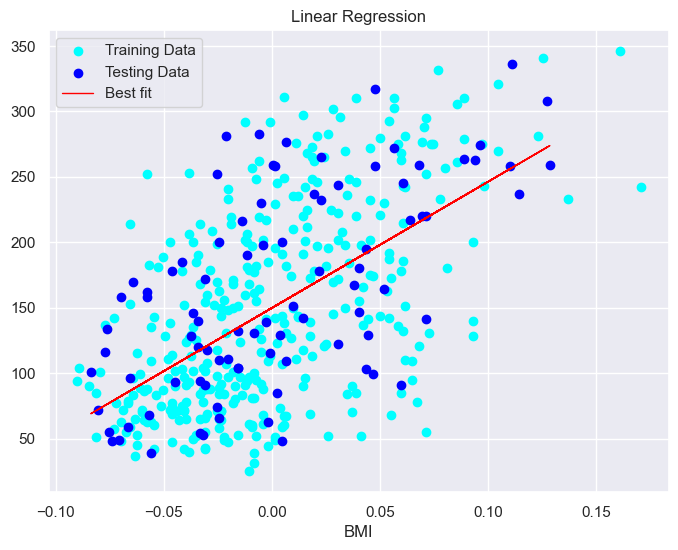

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_full, y_train_full, color='Cyan', label='Training Data')
plt.scatter(X_test_full, y_test_full, color='Blue', label='Testing Data')
plt.plot(X_test_full, y_pred_full, color='red', linewidth=1, label='Best fit')
plt.xlabel('BMI')
plt.title('Linear Regression')
plt.legend()
plt.show()